In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [19]:
import PIL

In [20]:
from PIL import Image
import numpy as np

In [21]:
img=np.array(Image.open('./dataset/accordion/image_0003.jpg'))

In [22]:
import matplotlib.pyplot as plt

In [23]:
img.shape

(282, 300, 3)

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Reshape

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50


In [25]:
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(200, 300, 3), classes=101)

In [26]:
len(resnet_model.layers)

175

In [27]:

for layer in resnet_model.layers[:160]:
    layer.trainable = False

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        './dataset',
        target_size=(200, 300),
        batch_size=128,
        class_mode='categorical')

Found 8680 images belonging to 101 classes.


In [29]:
flat = Flatten()(resnet_model.output)
d1 = Dense(512, activation="relu")(flat)
d2 = Dense(256, activation="relu")(d1)
d3 = Dense(128, activation="relu")(d2)
out = Dense(101, activation="softmax")(d3)

In [30]:

model = Model(inputs=resnet_model.input, outputs=out)

In [31]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit_generator(train_generator, epochs=5)

  ...
    to  
  ['...']
Train for 68 steps
Epoch 1/5
68/68 [==============================] - 98s 1s/step - loss: 4.2719 - accuracy: 0.4953
Epoch 2/5
68/68 [==============================] - 101s 1s/step - loss: 0.5693 - accuracy: 0.8552
Epoch 3/5
68/68 [==============================] - 104s 2s/step - loss: 0.1772 - accuracy: 0.9514
Epoch 4/5
68/68 [==============================] - 106s 2s/step - loss: 0.0852 - accuracy: 0.9767
Epoch 5/5
68/68 [==============================] - 107s 2s/step - loss: 0.0629 - accuracy: 0.9813


In [42]:
img = load_img("./dataset/cellphone/image_0002.jpg", target_size=(200, 300))

In [43]:
cell = np.array(img)

In [44]:
cell.shape

(200, 300, 3)

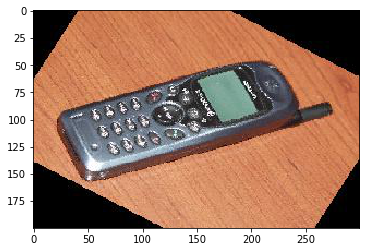

In [45]:
plt.imshow(cell)

In [46]:
model.predict(np.array([cell])).argmax(axis=1)

array([21], dtype=int64)

In [41]:
train_generator.class_indices

{'Faces': 0,
 'Faces_easy': 1,
 'Leopards': 2,
 'Motorbikes': 3,
 'accordion': 4,
 'airplanes': 5,
 'anchor': 6,
 'ant': 7,
 'barrel': 8,
 'bass': 9,
 'beaver': 10,
 'binocular': 11,
 'bonsai': 12,
 'brain': 13,
 'brontosaurus': 14,
 'buddha': 15,
 'butterfly': 16,
 'camera': 17,
 'cannon': 18,
 'car_side': 19,
 'ceiling_fan': 20,
 'cellphone': 21,
 'chair': 22,
 'chandelier': 23,
 'cougar_body': 24,
 'cougar_face': 25,
 'crab': 26,
 'crayfish': 27,
 'crocodile': 28,
 'crocodile_head': 29,
 'cup': 30,
 'dalmatian': 31,
 'dollar_bill': 32,
 'dolphin': 33,
 'dragonfly': 34,
 'electric_guitar': 35,
 'elephant': 36,
 'emu': 37,
 'euphonium': 38,
 'ewer': 39,
 'ferry': 40,
 'flamingo': 41,
 'flamingo_head': 42,
 'garfield': 43,
 'gerenuk': 44,
 'gramophone': 45,
 'grand_piano': 46,
 'hawksbill': 47,
 'headphone': 48,
 'hedgehog': 49,
 'helicopter': 50,
 'ibis': 51,
 'inline_skate': 52,
 'joshua_tree': 53,
 'kangaroo': 54,
 'ketch': 55,
 'lamp': 56,
 'laptop': 57,
 'llama': 58,
 'lobster': 5

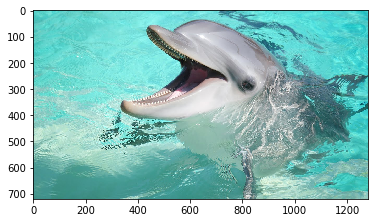

In [125]:
plt.imshow(img_test)

In [114]:
model.predict(img_test)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>